<a href="https://colab.research.google.com/github/han-jisu0525/pre_onboarding/blob/main/23_11_29class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install finance_datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
df = fdr.StockListing('NASDAQ')
df.head(20)

100%|██████████| 3942/3942 [00:30<00:00, 128.95it/s]


,Symbol,Name,IndustryCode,Industry
0,AAPL,Apple Inc,57106020,전화 및 소형 장치
1,MSFT,Microsoft Corp,57201020,소프트웨어
2,AMZN,Amazon.com Inc,53402010,백화점
3,NVDA,NVIDIA Corp,57101010,반도체
4,GOOGL,Alphabet Inc Class A,57201030,온라인 서비스
5,META,Meta Platforms Inc,57201030,온라인 서비스
6,GOOG,Alphabet Inc Class C,57201030,온라인 서비스
7,TSLA,Tesla Inc,53101010,자동차 및 트럭 제조
8,AVGO,Broadcom Inc,57101010,반도체
9,ADBE,Adobe Inc,57201020,소프트웨어


In [ ]:
# 'NVIDIA Corp'인 행을 선택
df[df.Name == 'NVIDIA Corp']

,Symbol,Name,IndustryCode,Industry
3,NVDA,NVIDIA Corp,57101010,반도체


In [ ]:
# 2020 ~ 2022
df = fdr.DataReader('NVDA', '2020', '2022')

In [ ]:
# 최근 주식 5개
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-27,296.600006,310.869995,296.399994,309.050964,40368600
2021-12-28,313.119995,313.299988,300.119995,302.828979,42059100
2021-12-29,302.730011,305.480011,293.660004,299.623108,34313900
2021-12-30,298.269989,304.570007,295.399994,295.478485,30886400
2021-12-31,296.739990,300.299988,293.309998,293.730713,26653000


In [ ]:
# 데이터 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    505 non-null    float64
 1   High    505 non-null    float64
 2   Low     505 non-null    float64
 3   Close   505 non-null    float64
 4   Volume  505 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.7 KB


In [ ]:
# 월별 데이터의 평균으로 다운 샘플링하여 저장하기
df_month = df.resample('BM').mean()
df_month.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970347,2.916863e+07
2020-02-28,67.050000,68.891448,66.039737,67.479541,6.236133e+07
2020-03-31,60.518183,63.079205,58.258636,60.692791,7.169978e+07
2020-04-30,69.391666,70.897620,67.797381,69.026949,5.370621e+07
2020-05-29,81.483000,83.311125,79.973375,81.575508,6.274438e+07


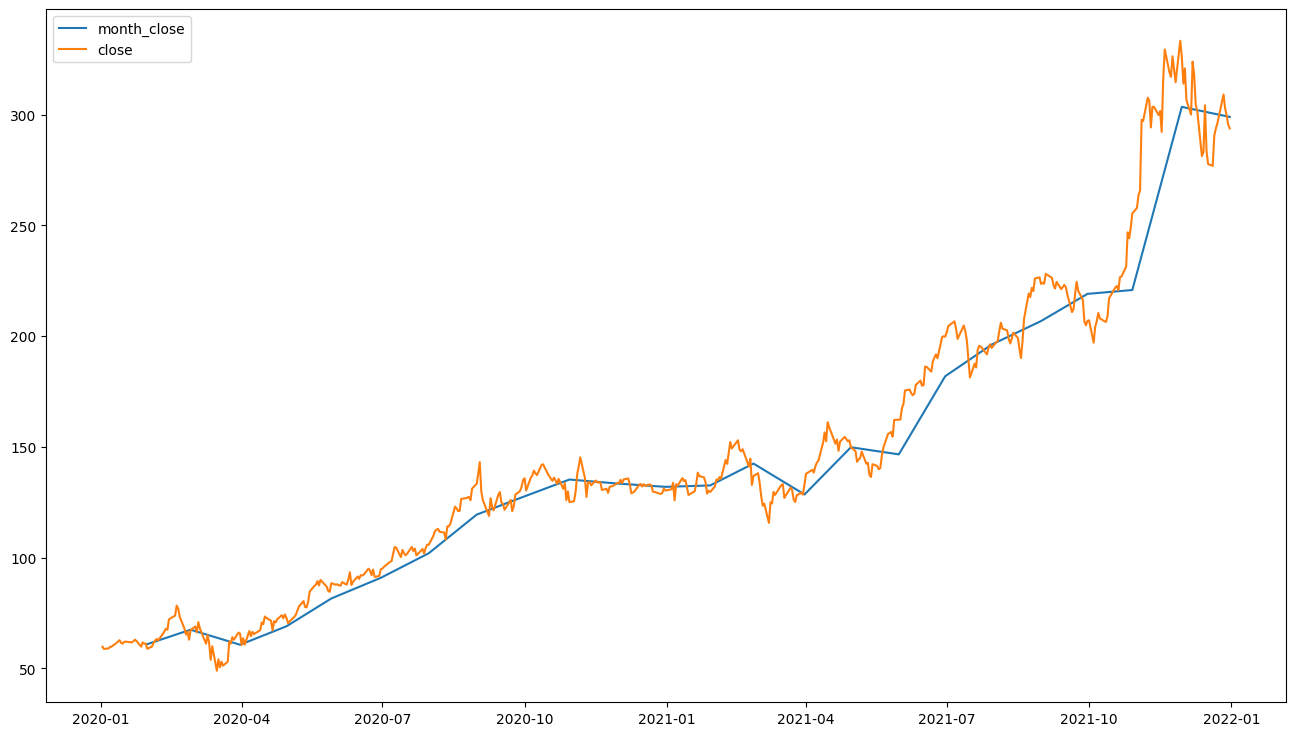

In [ ]:
# 월별 종가평균을 시각화로 확인하기
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 9))
plt.plot(df_month['Close'], label = 'month_close')
plt.plot(df['Close'], label = 'close')
plt.legend()

In [ ]:
# 종가를 이용하여 월별 수익률 구하기: pct_change() 사용
df_month['rtn'] = df_month['Close'].pct_change()
df_month

,Open,High,Low,Close,Volume,rtn
Date,,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970347,2.916863e+07,NaN
2020-02-28,67.050000,68.891448,66.039737,67.479541,6.236133e+07,0.106760
2020-03-31,60.518183,63.079205,58.258636,60.692791,7.169978e+07,-0.100575
2020-04-30,69.391666,70.897620,67.797381,69.026949,5.370621e+07,0.137317
2020-05-29,81.483000,83.311125,79.973375,81.575508,6.274438e+07,0.181792
2020-06-30,91.100909,92.442727,89.457386,90.900985,4.417938e+07,0.114317
2020-07-31,102.068409,103.709318,100.466932,101.983692,3.679296e+07,0.121921
2020-08-31,118.995714,121.199642,117.377024,119.420915,4.605973e+07,0.170981
2020-09-30,128.181072,131.072977,124.355953,127.415859,7.550739e+07,0.066948


In [ ]:
# 주가 흐름 파악하기: rolling()
#rolling(2).mean()을 사용해서 2달씩 종가의 평균을 구할 수 있다.
df_month['MA'] = df_month['Close'].rolling(2).mean()
df_month.head()

,Open,High,Low,Close,Volume,rtn,MA
Date,,,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970347,2.916863e+07,NaN,NaN
2020-02-28,67.050000,68.891448,66.039737,67.479541,6.236133e+07,0.106760,64.224944
2020-03-31,60.518183,63.079205,58.258636,60.692791,7.169978e+07,-0.100575,64.086166
2020-04-30,69.391666,70.897620,67.797381,69.026949,5.370621e+07,0.137317,64.859870
2020-05-29,81.483000,83.311125,79.973375,81.575508,6.274438e+07,0.181792,75.301228


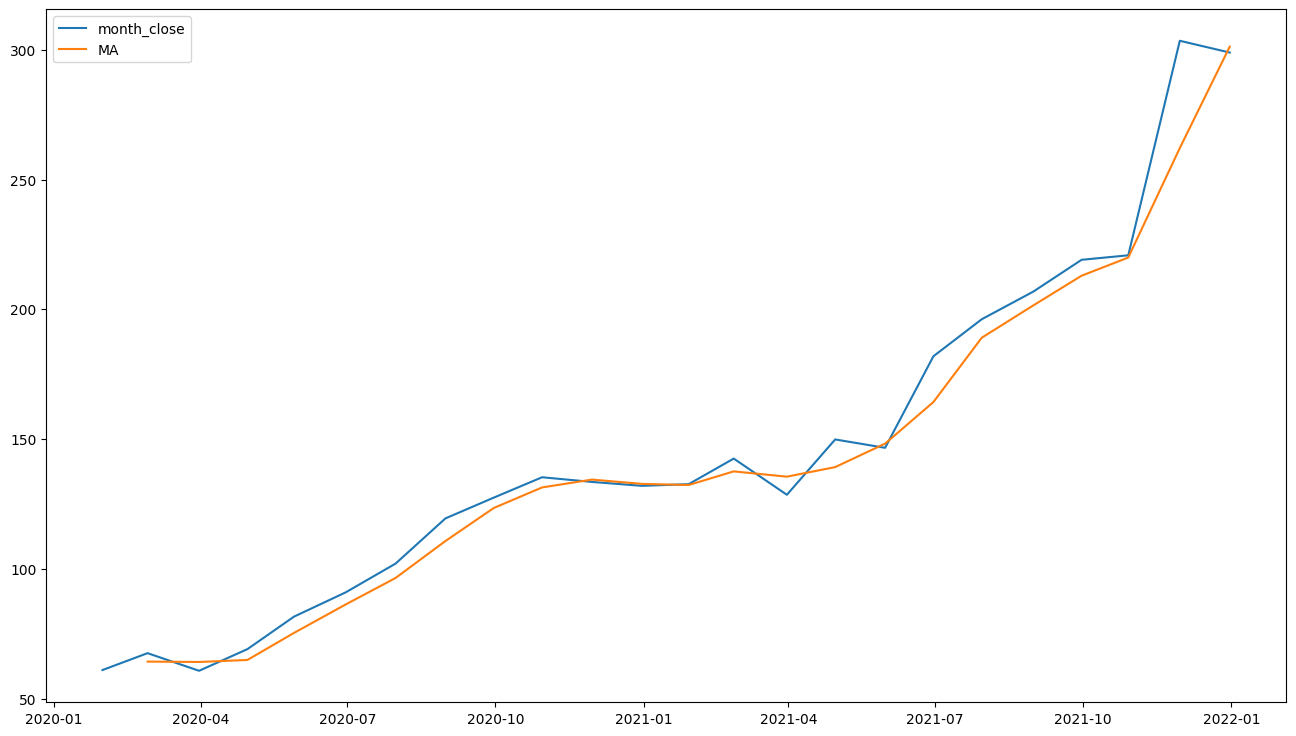

In [ ]:
# df_month의 종가와 이동평균선을 시각화하기
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 9))
plt.plot(df_month['Close'], label = 'month_close')
plt.plot(df_month['MA'], label = 'MA')
plt.legend()

In [ ]:
# 3개월의 이동평균선을 구해 'MA1' 컬럼에 추가
df_month['MA1'] = df_month['Close'].rolling(3).mean()
df_month.head()

,Open,High,Low,Close,Volume,rtn,MA,MA1
Date,,,,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970347,2.916863e+07,NaN,NaN,NaN
2020-02-28,67.050000,68.891448,66.039737,67.479541,6.236133e+07,0.106760,64.224944,NaN
2020-03-31,60.518183,63.079205,58.258636,60.692791,7.169978e+07,-0.100575,64.086166,63.047560
2020-04-30,69.391666,70.897620,67.797381,69.026949,5.370621e+07,0.137317,64.859870,65.733094
2020-05-29,81.483000,83.311125,79.973375,81.575508,6.274438e+07,0.181792,75.301228,70.431749


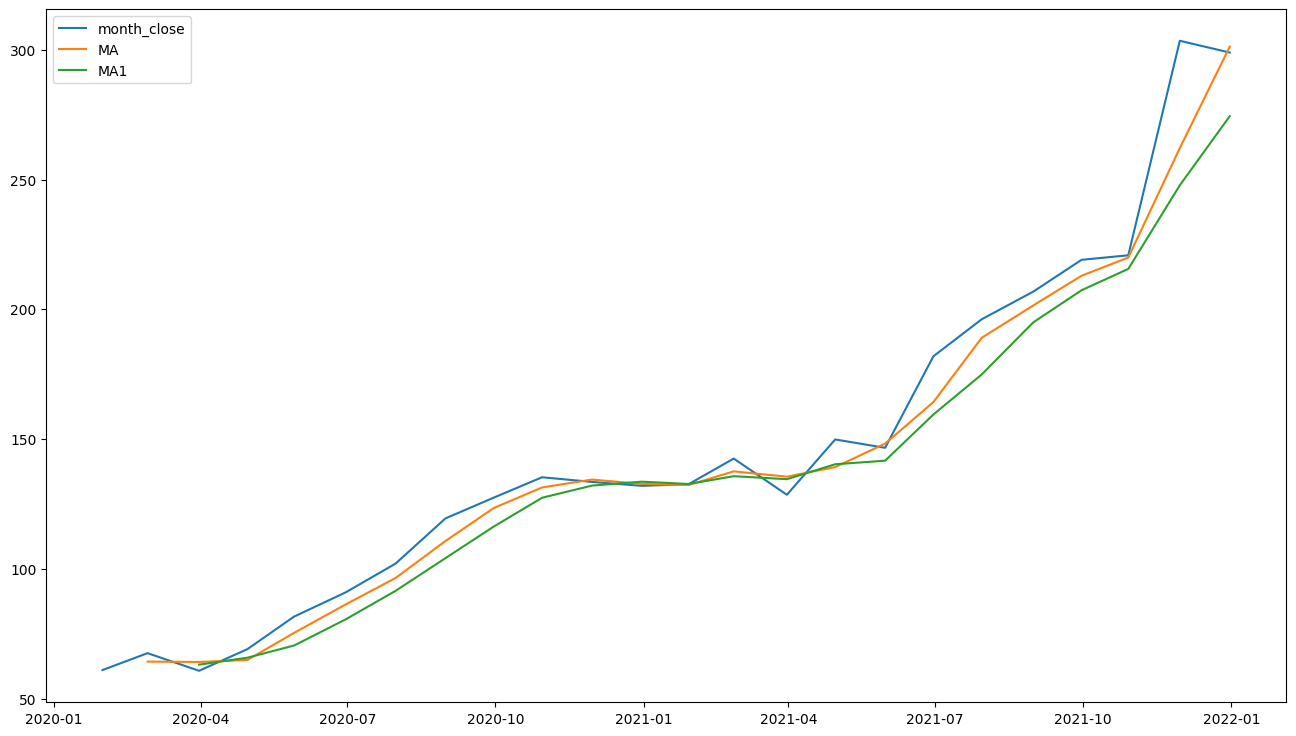

In [ ]:
# Close, MA, MA1을 그래프로 시각화
plt.figure(figsize = (16, 9))
plt.plot(df_month['Close'], label = 'month_close')
plt.plot(df_month['MA'], label = 'MA')
plt.plot(df_month['MA1'], label = 'MA1')
plt.legend()

In [ ]:
# 최근 종가를 가져와 이동평균선과 비교를 통해 상승장인지 하락장인지 구분

# 최근 두 달 평균
last_close = df_month['MA'].iloc[-1]

# 오늘 종가
price = df['Close'].iloc[-1]

if price > last_close:
  print("상승 장")
elif price < last_close:
  print("하락 장")
else:
  print("변화 없음")

하락 장


In [ ]:
# (오늘의 활동) 자신이 관심있는 종목을 분석하기 (현재 하락장인지 상승장인지)
df1 = fdr.StockListing('KRX')
df1.head(20)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72700,3,0,0.00,72400,72800,72200,9240140,670021570270,434003191385000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,447000,1,12000,2.76,440000,447500,434000,202968,89882185000,104598000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,130400,2,-1000,-0.76,130200,131000,128900,2223949,288705543500,94931508396000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,729000,1,2000,0.28,727000,732000,723000,66172,48233690000,51885846000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,57800,2,-100,-0.17,57800,57900,57500,438575,25331193400,47562851260000,822886700,STK
5,005490,KR7005490008,POSCO홀딩스,KOSPI,,483000,1,5000,1.05,480000,485500,474000,532312,255074679500,40847904090000,84571230,STK
6,005380,KR7005380001,현대차,KOSPI,,184800,2,-900,-0.48,185700,186500,184700,296617,55032692583,39091022308800,211531506,STK
7,051910,KR7051910008,LG화학,KOSPI,,504000,3,0,0.00,507000,511000,495500,325128,163370714500,35578540872000,70592343,STK
8,000270,KR7000270009,기아,KOSPI,,86000,1,1400,1.65,84200,86200,84200,1345130,115258583200,34575801458000,402044203,STK
9,035420,KR7035420009,NAVER,KOSPI,,207500,3,0,0.00,208500,209000,205500,494138,102472631000,33699783255000,162408594,STK


In [ ]:
df1[df1.Name == 'NAVER']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
9,035420,KR7035420009,NAVER,KOSPI,,207500,3,0,0.0,208500,209000,205500,494138,102472631000,33699783255000,162408594,STK


In [ ]:
# 2020 ~ 2023
df1 = fdr.DataReader('NVDA', '2020', '2023')

In [ ]:
# 최근 주식 5개
df1.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-23,151.960007,153.389999,148.830002,152.005920,34932600
2022-12-27,150.740005,151.000000,140.559998,141.159790,46490200
2022-12-28,139.270004,142.619995,138.839996,140.310074,35106600
2022-12-29,144.020004,146.830002,142.270004,145.978073,35492300
2022-12-30,143.339996,146.289993,142.330002,146.088028,31049000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    756 non-null    float64
 1   High    756 non-null    float64
 2   Low     756 non-null    float64
 3   Close   756 non-null    float64
 4   Volume  756 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.4 KB


In [ ]:
# 월별 데이터의 평균으로 다운 샘플링하여 저장하기
df1_month = df1.resample('BM').mean()
df1_month.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970346,2.916863e+07
2020-02-28,67.050000,68.891448,66.039737,67.479542,6.236133e+07
2020-03-31,60.518183,63.079205,58.258636,60.692793,7.169978e+07
2020-04-30,69.391666,70.897620,67.797381,69.026949,5.370621e+07
2020-05-29,81.483000,83.311125,79.973375,81.575505,6.274438e+07


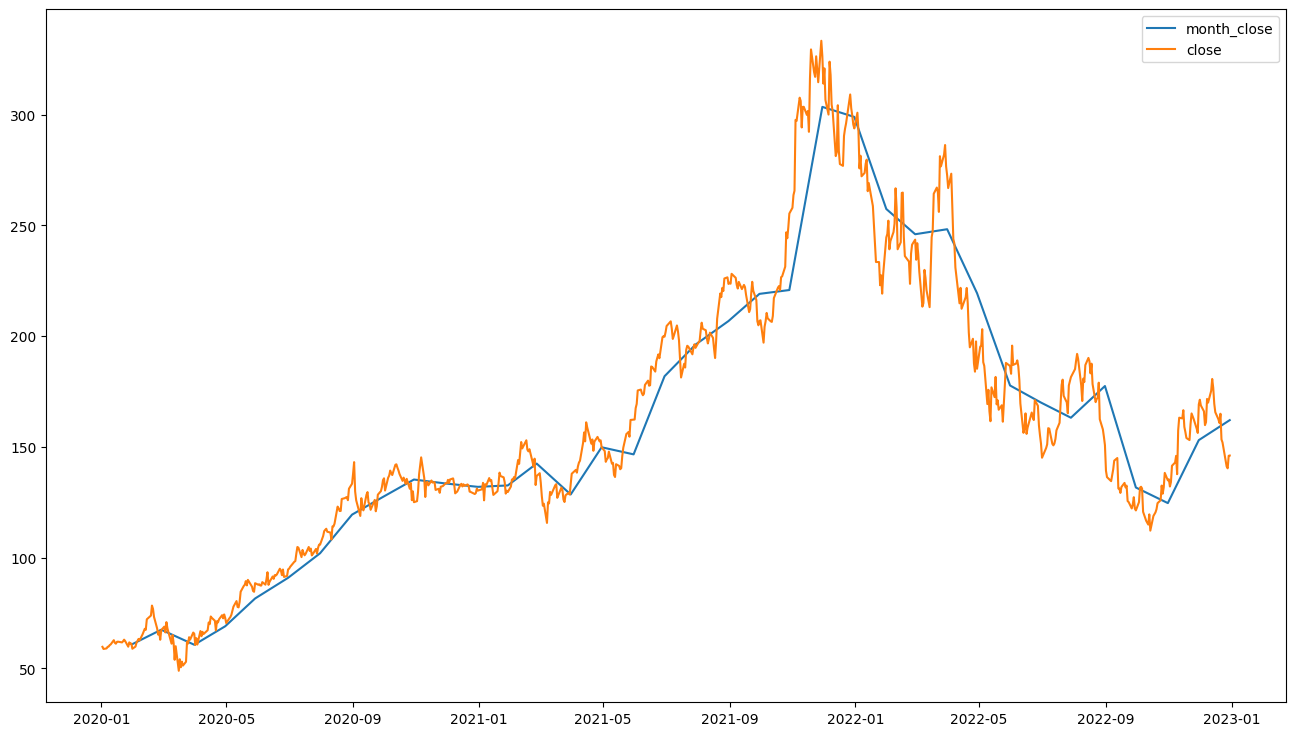

In [ ]:
# 월별 종가평균을 시각화로 확인하기
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 9))
plt.plot(df1_month['Close'], label = 'month_close')
plt.plot(df1['Close'], label = 'close')
plt.legend()

In [ ]:
# 종가를 이용하여 월별 수익률 구하기: pct_change() 사용
df1_month['rtn'] = df1_month['Close'].pct_change()
df1_month

,Open,High,Low,Close,Volume,rtn
Date,,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970346,2.916863e+07,NaN
2020-02-28,67.050000,68.891448,66.039737,67.479542,6.236133e+07,0.106760
2020-03-31,60.518183,63.079205,58.258636,60.692793,7.169978e+07,-0.100575
2020-04-30,69.391666,70.897620,67.797381,69.026949,5.370621e+07,0.137317
2020-05-29,81.483000,83.311125,79.973375,81.575505,6.274438e+07,0.181792
2020-06-30,91.100909,92.442727,89.457386,90.900984,4.417938e+07,0.114317
2020-07-31,102.068409,103.709318,100.466932,101.983693,3.679296e+07,0.121921
2020-08-31,118.995714,121.199642,117.377024,119.420911,4.605973e+07,0.170980
2020-09-30,128.181072,131.072977,124.355953,127.415856,7.550739e+07,0.066948


In [ ]:
# 2달씩 종가의 평균 구하기
df1_month['MA'] = df1_month['Close'].rolling(2).mean()
df1_month.tail()

,Open,High,Low,Close,Volume,rtn,MA
Date,,,,,,,
2022-08-31,177.085652,181.339130,173.816521,177.461292,5.247673e+07,0.087681,170.308492
2022-09-30,132.035238,134.734286,129.228096,131.657947,6.252656e+07,-0.258103,154.559620
2022-10-31,124.096191,127.819048,121.266667,124.621869,5.975846e+07,-0.053442,128.139908
2022-11-30,152.243808,156.074762,149.255715,153.044168,5.047906e+07,0.228068,138.833019
2022-12-30,162.578096,165.405714,158.701906,162.066630,4.260072e+07,0.058953,157.555399


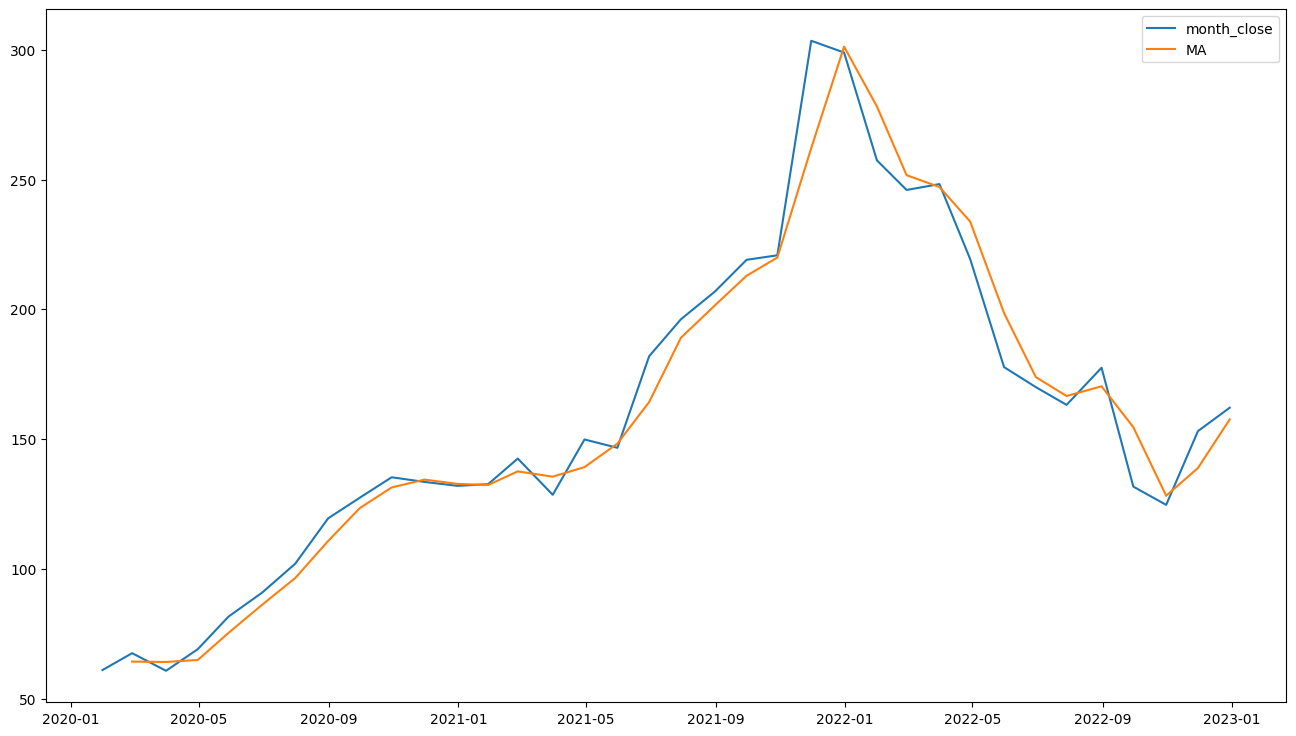

In [ ]:
# df1_month의 종가와 이동평균선을 시각화하기
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 9))
plt.plot(df1_month['Close'], label = 'month_close')
plt.plot(df1_month['MA'], label = 'MA')
plt.legend()

In [ ]:
# 3개월의 이동평균선을 구해 'MA1' 컬럼에 추가
df1_month['MA1'] = df1_month['Close'].rolling(3).mean()
df1_month.head()

,Open,High,Low,Close,Volume,rtn,MA,MA1
Date,,,,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970346,2.916863e+07,NaN,NaN,NaN
2020-02-28,67.050000,68.891448,66.039737,67.479542,6.236133e+07,0.106760,64.224944,NaN
2020-03-31,60.518183,63.079205,58.258636,60.692793,7.169978e+07,-0.100575,64.086168,63.047561
2020-04-30,69.391666,70.897620,67.797381,69.026949,5.370621e+07,0.137317,64.859871,65.733095
2020-05-29,81.483000,83.311125,79.973375,81.575505,6.274438e+07,0.181792,75.301227,70.431749


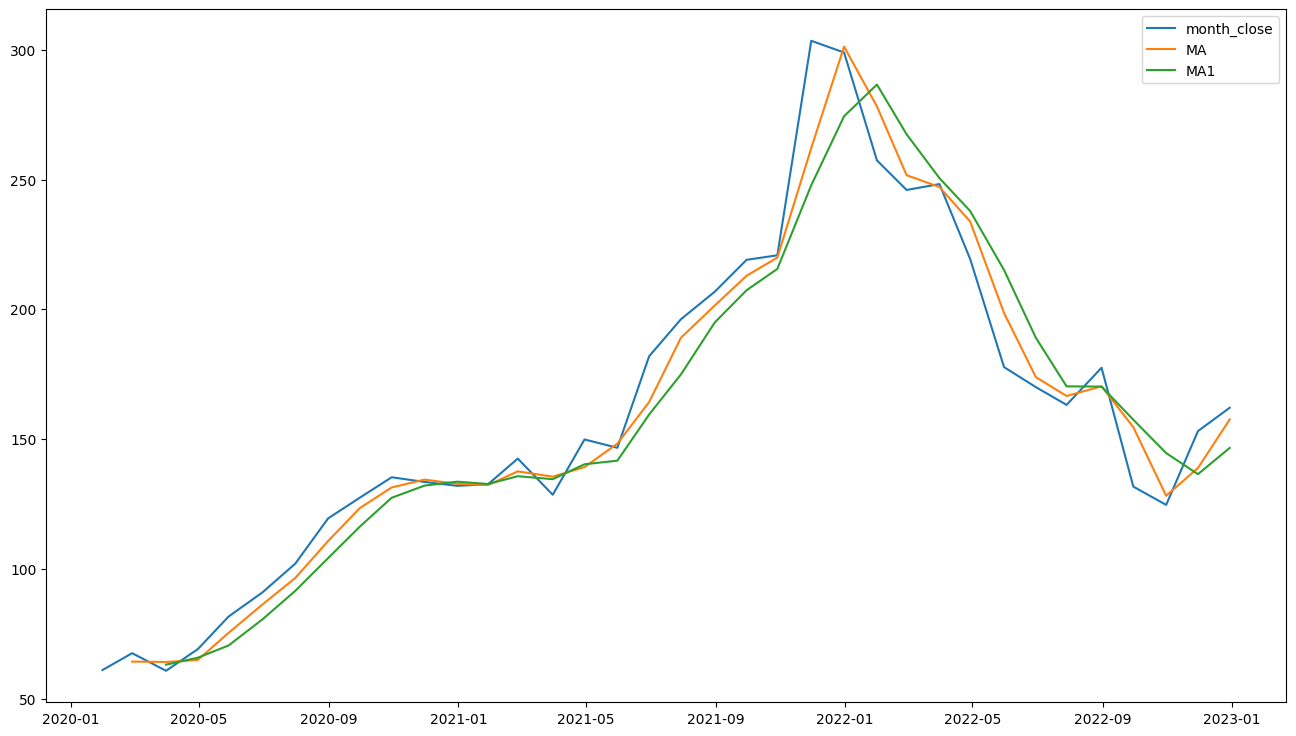

In [ ]:
# Close, MA, MA1을 그래프로 시각화
plt.figure(figsize = (16, 9))
plt.plot(df1_month['Close'], label = 'month_close')
plt.plot(df1_month['MA'], label = 'MA')
plt.plot(df1_month['MA1'], label = 'MA1')
plt.legend()

In [ ]:
# 최근 종가를 가져와 이동평균선과 비교를 통해 상승장인지 하락장인지 구분

# 최근 두 달 평균
last_close = df1_month['MA'].iloc[-1]

# 오늘 종가
price = df1['Close'].iloc[-1]

if price > last_close:
  print("상승 장")
elif price < last_close:
  print("하락 장")
else:
  print("변화 없음")

하락 장


In [ ]:
# 관심있는 종목 분석하기 => NAVER
# 현재 장이 어떤지? => 하락 장
# 투자 전략 제안 =>